In [ ]:
#pip install bnltk

In [ ]:
import numpy as np
import pandas as pd
import unicodedata
import re
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
import nltk
from keras.layers import Layer
import keras.backend as K
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import tensorflow_datasets as tfds
import tensorflow_addons as tfa
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

In [ ]:
#from bnltk.stemmer import BanglaStemmer
#from bnltk.bnltk_downloads import DataFiles
#from bnltk.tokenize import Tokenizers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_excel("/content/drive/My Drive/Copy of abuse (2).xlsx")

In [ ]:
data1=pd.read_excel("/content/drive/My Drive/Copy of funny (1).xlsx")

In [ ]:
data2=pd.read_excel("/content/drive/My Drive/help.xlsx")

In [ ]:
data3=pd.read_excel("/content/drive/My Drive/Copy of sad (1).xlsx")

In [ ]:
dataM = pd.concat([data, data1],ignore_index=True)
dataM

,Unnamed: 0,Sentences,Labels
0,NaN,খারাপ মেয়ে ছেলে,1
1,NaN,এই মেয়ের চরিত্রে সমস্যা আছে,1
2,NaN,আপনি এত বাজে পোশাক পরেন কেন,1
3,NaN,আপনার মত জঘন্য গান এর আগে শুনি নি,1
4,NaN,চেহারা দেখে তো গাঞ্জাখোর মনে হয়,1
...,...,...,...
312,NaN,তোর মাথা খুব উর্বর জায়গা,2
313,NaN,আমার মাথায় তো গোবর ভরা নাই,2
314,NaN,শয়তানিতে আমার জীবন অতিষ্ঠ,2
315,NaN,জীবনে প্রথম কোনো ভালো কাজ করলে মনে হয়,2


In [ ]:
dataM = pd.concat([dataM, data2], ignore_index=True)
dataM

,Unnamed: 0,Sentences,Labels
0,NaN,খারাপ মেয়ে ছেলে,1
1,NaN,এই মেয়ের চরিত্রে সমস্যা আছে,1
2,NaN,আপনি এত বাজে পোশাক পরেন কেন,1
3,NaN,আপনার মত জঘন্য গান এর আগে শুনি নি,1
4,NaN,চেহারা দেখে তো গাঞ্জাখোর মনে হয়,1
...,...,...,...
414,NaN,কেউ চাকরি দিয়ে সাহায্য করতে পারলে জানাবেন,3
415,NaN,একটি চাকরির সাহায্যের দরকার,3
416,NaN,টিউশনি সাহায্যের দরকার,3
417,NaN,কোথায় কুকুরের খাওয়া পাওয়া যায় জানতে পারলে ...,3


In [ ]:
dataM = pd.concat([dataM, data3], ignore_index=True)
dataM

,Unnamed: 0,Sentences,Labels
0,NaN,খারাপ মেয়ে ছেলে,1
1,NaN,এই মেয়ের চরিত্রে সমস্যা আছে,1
2,NaN,আপনি এত বাজে পোশাক পরেন কেন,1
3,NaN,আপনার মত জঘন্য গান এর আগে শুনি নি,1
4,NaN,চেহারা দেখে তো গাঞ্জাখোর মনে হয়,1
...,...,...,...
565,NaN,আমাকে তার কথামতো সব খারাপ কাজ করতে বাধ্য করেছে,4
566,NaN,এসব কথা আমার পক্ষে সহ্য করা হয়ে উঠলো না,4
567,NaN,অনেক কষ্টের সাথে এসব অপমান সহ্য করতে হলো,4
568,NaN,মুখ বুজে সব অপমান সহ্য করতে হলো,4


In [ ]:
dataM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   Sentences   570 non-null    object 
 2   Labels      570 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 13.5+ KB


In [ ]:
#dataM.reset_index()
lines = dataM['Sentences']
labels = dataM['Labels']

In [ ]:
print(lines.shape)

(570,)


In [ ]:
print(lines[0])

খারাপ মেয়ে ছেলে


In [ ]:
print(labels)

0      1
1      1
2      1
3      1
4      1
      ..
565    4
566    4
567    4
568    4
569    4
Name: Labels, Length: 570, dtype: int64


In [ ]:
#######t = Tokenizers()
#print(t.bn_word_tokenizer(line))
#tokenized = t.bn_word_tokenizer(line)

In [ ]:
#bn_stemmer = BanglaStemmer()
#ls=[]
#for line in lines:
#  st1=""
#  tokenized = t.bn_word_tokenizer(line)
# for str in tokenized:
#   #print(bn_stemmer.stem(str))
#    st1 = st1+ " "+bn_stemmer.stem(str)
#  ls.append(st1)


In [ ]:
#print(ls)

In [ ]:
#print(ls[0])

In [ ]:
#print(len(ls))

In [ ]:
#print(dataM['Labels'])

In [ ]:
#newd1 = np.where(dataM['Labels'] == 1)
#newd2 = np.where(dataM['Labels'] == 2)
#newd3 = np.where(dataM['Labels'] == 3)
#newd4 = np.where(dataM['Labels'] == 4)
#print(len(data))
#print(len(data1))
#print(len(data2))
#print(len(data3))

In [ ]:
#print(labels[115])
#print(labels[118])

In [ ]:
#ls[0:101]

In [ ]:
#print(len(labels))

In [ ]:
#train_features=[]
train_features = lines.iloc[0:101]
#for i in range(116,298):
train_features = train_features.append(lines.iloc[116:298])
#for i in range(317,376):
train_features = train_features.append(lines.iloc[317:376])
#for i in range(383,520):
train_features = train_features.append(lines.iloc[383:520])
#train_features.append(ls[0][317:376])
#train_features.append(ls[0][383:483])
#train_features = train_features.append(ls[383:520])
test_features = lines.iloc[101:116]
#for i in range(298,317):
test_features = test_features.append(lines.iloc[298:317])
#for i in range(376,383):
test_features =test_features.append(lines.iloc[376:383])
#for i in range(520,534):
test_features =test_features.append(lines.iloc[520:534])
#test_features = test_features.append(feature.iloc[newd0[0][72345:77053]])
#test_features = feature.iloc[newd[0][66708:71416]]
#test_features = test_features.append(feature.iloc[newd0[0][72345:77053]])
train_labels = labels[0:101]
train_labels = train_labels.append(labels[116:298])
train_labels = train_labels.append(labels[317:376])
train_labels = train_labels.append(labels[383:520])
test_labels = labels[101:116]
test_labels = test_labels.append(labels[298:317])
test_labels = test_labels.append(labels[376:383])
test_labels = test_labels.append(labels[520:534])
#train_labels = train_labels.append(label.iloc[newd0[0][0:72345]])
#test_labels = label.iloc[newd[0][66708:]]
#test_labels = test_labels.append(label.iloc[newd0[0][72345:]])

In [ ]:
print(len(train_features))

479


In [ ]:
print(len(train_labels))

479


In [ ]:
vocab_size = 100000
embedding_dim = 2000
oov_token = '<unk>'
emotion_tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size, oov_token=oov_token)
emotion_tokenizer.fit_on_texts(train_features)
train_data = emotion_tokenizer.texts_to_sequences(train_features)
print(train_data[0])

[29, 44, 461]


In [ ]:
train_data = tf.keras.preprocessing.sequence.pad_sequences(train_data, maxlen=10, padding='post', truncating='post')
print(train_data[0])

[ 29  44 461   0   0   0   0   0   0   0]


In [ ]:
test_data = emotion_tokenizer.texts_to_sequences(test_features)
test_data = tf.keras.preprocessing.sequence.pad_sequences(test_data, maxlen=10, padding='post', truncating='post')
print(test_data[0])

[  9   5 491 291 993   0   0   0   0   0]


In [ ]:
class BahdanauAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)
    def call(self, query, values):
        query_with_time_axis = tf.expand_dims(query, 1)
        score = self.V(tf.nn.tanh( self.W1(query_with_time_axis) + self.W2(values)))
        attention_weights = tf.nn.softmax(score, axis=1)
        context_vector = attention_weights * values
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector, attention_weights

In [ ]:
from keras import backend as K
K.clear_session()
latent_dim = 500

# Encoder
encoder_inputs = tf.keras.layers.Input(shape=(10,))
enc_emb =tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=10)(encoder_inputs)

#LSTM 1
encoder_lstm1 = tf.keras.layers.Conv1D(128, 3, activation='relu')
encoder_output1 = encoder_lstm1(enc_emb)

#LSTM 2
encoder_lstm2 = tf.keras.layers.GlobalMaxPooling1D()
encoder_output2 = encoder_lstm2(encoder_output1)

encoder_output20 = encoder_output2[:,None,:]
decoder_lstm1 = tf.keras.layers.LSTM(20, return_sequences=True, return_state=True)
decoder_outputs1,decoder_fwd_state, decoder_back_state = decoder_lstm1(encoder_output20)

attn_layer = BahdanauAttention(10)
attn_out, attn_states = attn_layer(decoder_fwd_state,decoder_outputs1)
#attn_layer(encoder_output2)

midlayer = tf.keras.layers.GRU(20, return_sequences=True, return_state=True)
mid_out,_ = midlayer(encoder_output20)



decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([tf.squeeze(mid_out,[1]), attn_out])
#LSTM 3
encoder_lstm3=tf.keras.layers.Dense(24, activation='relu',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.1))
encoder_outputs= encoder_lstm3(decoder_concat_input)

encoder_lstm7=tf.keras.layers.Dropout(0.4)
enc_new = encoder_lstm7(encoder_outputs)

decoder_lstm = tf.keras.layers.Dense(4, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.01))
decoder_outputs = decoder_lstm(enc_new)

# Set up the decoder.
#decoder_inputs = Input(shape=(None,))
#dec_emb_layer = Embedding(y_voc_size, latent_dim,trainable=True)
#dec_emb = dec_emb_layer(decoder_inputs)

#LSTM using encoder_states as initial state
#decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
#decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

#Attention Layer
#Attention layer attn_layer = AttentionLayer(name='attention_layer')
#attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# Concat attention output and decoder LSTM output
#decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#Dense layer
#decoder_dense = TimeDistributed(Dense(y_voc_size, activation='softmax'))
#decoder_outputs = decoder_dense(decoder_concat_input)

# Define the model
model = Model(encoder_inputs, decoder_outputs)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 10)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 10, 2000)     200000000   input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 8, 128)       768128      embedding[0][0]                  
__________________________________________________________________________________________________
global_max_pooling1d (GlobalMax (None, 128)          0           conv1d[0][0]                     
_______________________________________________________________________________________

In [ ]:
checkpoint_path = "training_bengali/cp-{epoch:04d}.ckpt"
#checkpoint_dir = path.dirname(checkpoint_path)
#"./checkpoints/train"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=1)

# Create a new model instance

# Save the weights using the `checkpoint_path` format
model.save_weights(checkpoint_path.format(epoch=0))


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
train_labels=train_labels.map({1: 0,2: 3, 3: 2, 4: 1})
test_labels=test_labels.map({1: 0,2: 3, 3: 2, 4: 1})

In [ ]:
print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)

(479, 10)
(55, 10)
(479,)
(55,)


In [ ]:
train_labels1=tf.one_hot(train_labels,depth=4)
test_labels1= tf.one_hot(test_labels, depth=4)

In [ ]:
num_epochs = 33
history = model.fit(train_data, train_labels1, epochs=num_epochs,callbacks=[cp_callback],validation_data=(test_data, test_labels1), verbose=2)

Epoch 1/33

Epoch 00001: saving model to training_bengali/cp-0001.ckpt
15/15 - 44s - loss: 5.4017 - accuracy: 0.3946 - val_loss: 5.0723 - val_accuracy: 0.3636
Epoch 2/33

Epoch 00002: saving model to training_bengali/cp-0002.ckpt
15/15 - 37s - loss: 4.6763 - accuracy: 0.5553 - val_loss: 4.4611 - val_accuracy: 0.4364
Epoch 3/33

Epoch 00003: saving model to training_bengali/cp-0003.ckpt
15/15 - 37s - loss: 3.9147 - accuracy: 0.7307 - val_loss: 3.8746 - val_accuracy: 0.5818
Epoch 4/33

Epoch 00004: saving model to training_bengali/cp-0004.ckpt
15/15 - 37s - loss: 3.2122 - accuracy: 0.9123 - val_loss: 3.3140 - val_accuracy: 0.7455
Epoch 5/33

Epoch 00005: saving model to training_bengali/cp-0005.ckpt
15/15 - 36s - loss: 2.7174 - accuracy: 0.9478 - val_loss: 2.9128 - val_accuracy: 0.8000
Epoch 6/33

Epoch 00006: saving model to training_bengali/cp-0006.ckpt
15/15 - 36s - loss: 2.3112 - accuracy: 0.9791 - val_loss: 2.5971 - val_accuracy: 0.8000
Epoch 7/33

Epoch 00007: saving model to train

[0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 1 0 2 3 3
 2 2 1 2 1 1 1 1 1 1 1 3 1 1 1 3 3 1]
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
111    0
112    0
113    0
114    0
115    0
298    3
299    3
300    3
301    3
302    3
303    3
304    3
305    3
306    3
307    3
308    3
309    3
310    3
311    3
312    3
313    3
314    3
315    3
316    3
376    2
377    2
378    2
379    2
380    2
381    2
382    2
520    1
521    1
522    1
523    1
524    1
525    1
526    1
527    1
528    1
529    1
530    1
531    1
532    1
533    1
Name: Labels, dtype: int64
(4, 4)


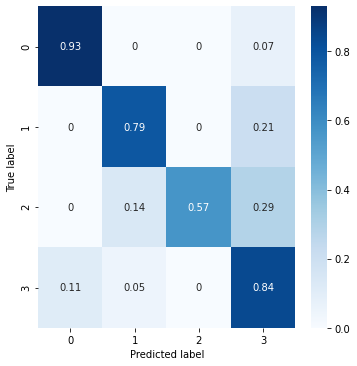

In [ ]:
model.load_weights("training_bengali/cp-0033.ckpt")
n= model.predict(test_data)
n = np.argmax(n,axis=1)
print(n)
print(test_labels)
con_mat = tf.math.confusion_matrix(K.flatten(test_labels), K.flatten(n)).numpy()
classes=[0,1,2,3]
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
print(con_mat_norm.shape)
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)
import seaborn as sns
figure = plt.figure(figsize=(5, 5))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

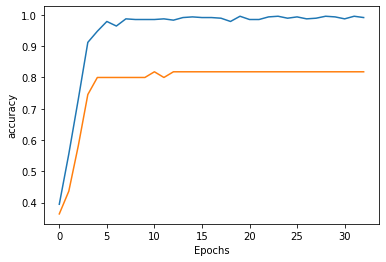

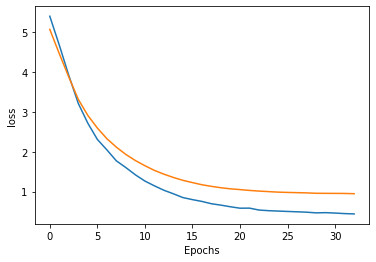

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  #plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")